In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from numpy.fft import fft, ifft
import scipy.signal
sns.set()

In [2]:
# ETL
dir_list=glob.glob('*.csv')
DF_MAIN = pd.DataFrame()
for i in range(len(dir_list)):
    print(dir_list[i])
    DF_AUX=pd.read_csv(dir_list[i])
    DF_AUX["start"] = dir_list[i][0:10]
    sample=int(dir_list[i][11:15])
    DF_AUX["time"] = np.linspace(0, DF_AUX.shape[0]*int(dir_list[i][11:15])/1000, DF_AUX.shape[0])
    DF_AUX["interval"] = dir_list[i][11:15]
    DF_AUX["interval"] = DF_AUX["interval"].astype(int)
    DF_AUX["sensor_id"] = dir_list[i][16:23]
    DF_MAIN = pd.concat([DF_MAIN,DF_AUX])

1623535615-3006-IAJ9206.csv
1624040490-2957-NAI1549.csv
1624374799-3006-MYS2071.csv
1624962426-3006-NAH4736.csv


00


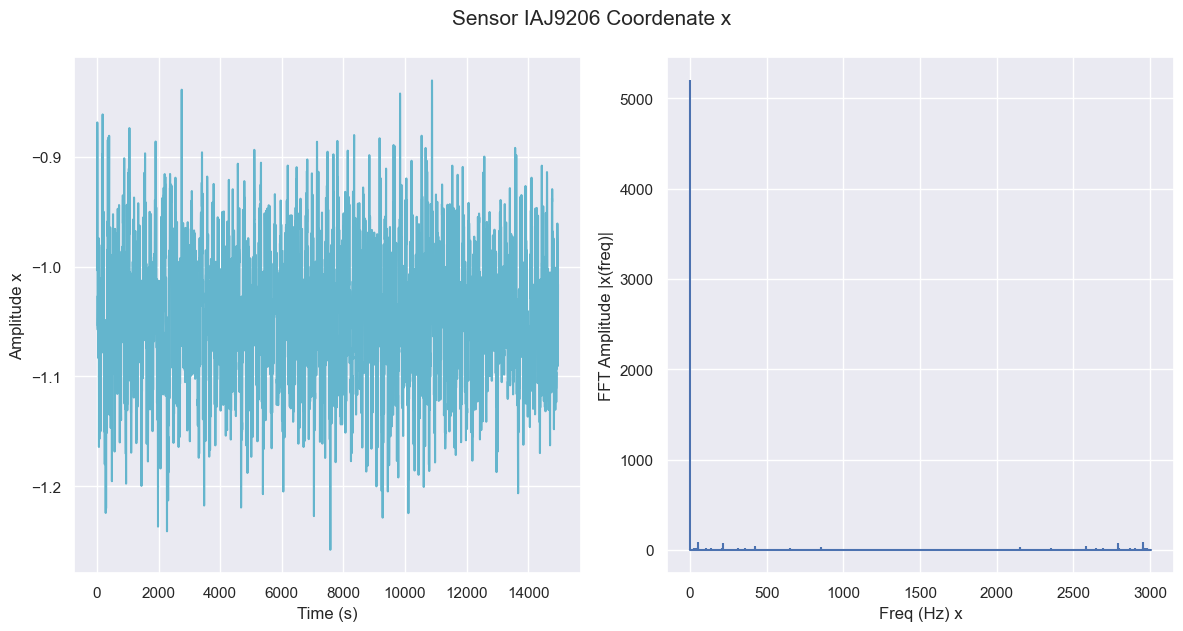

10


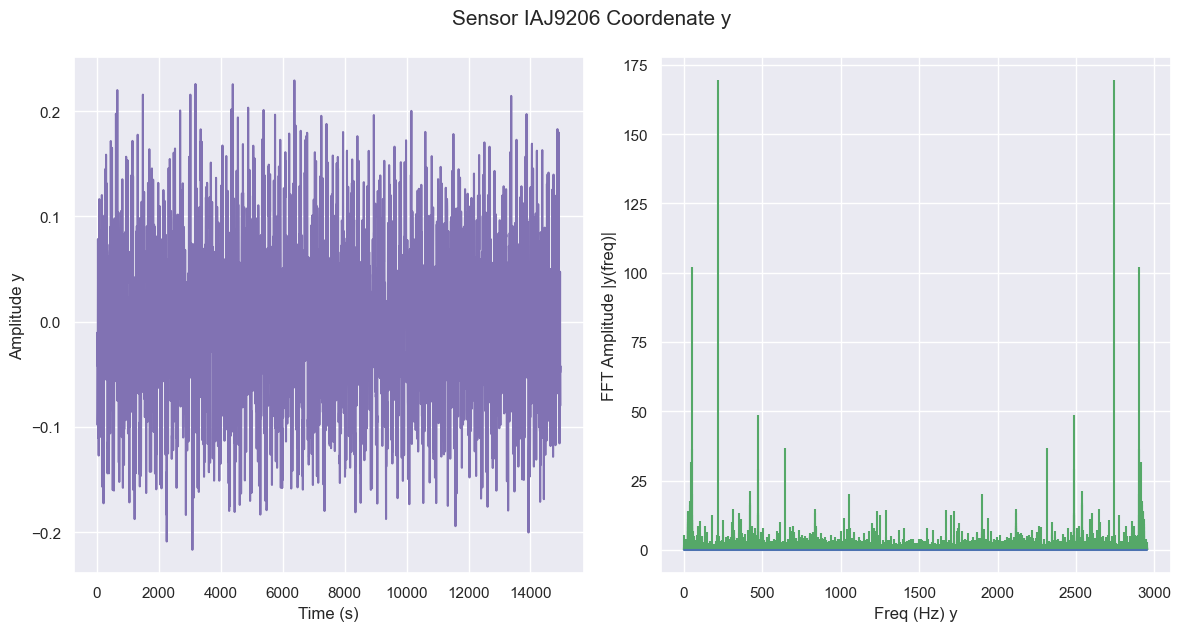

20


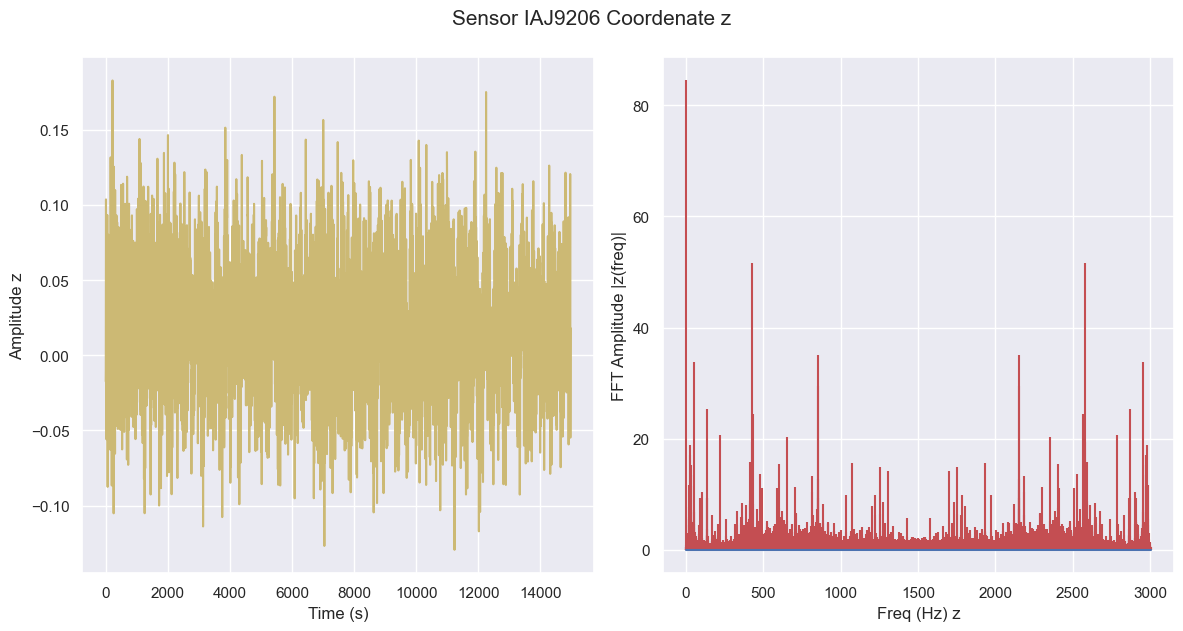

01


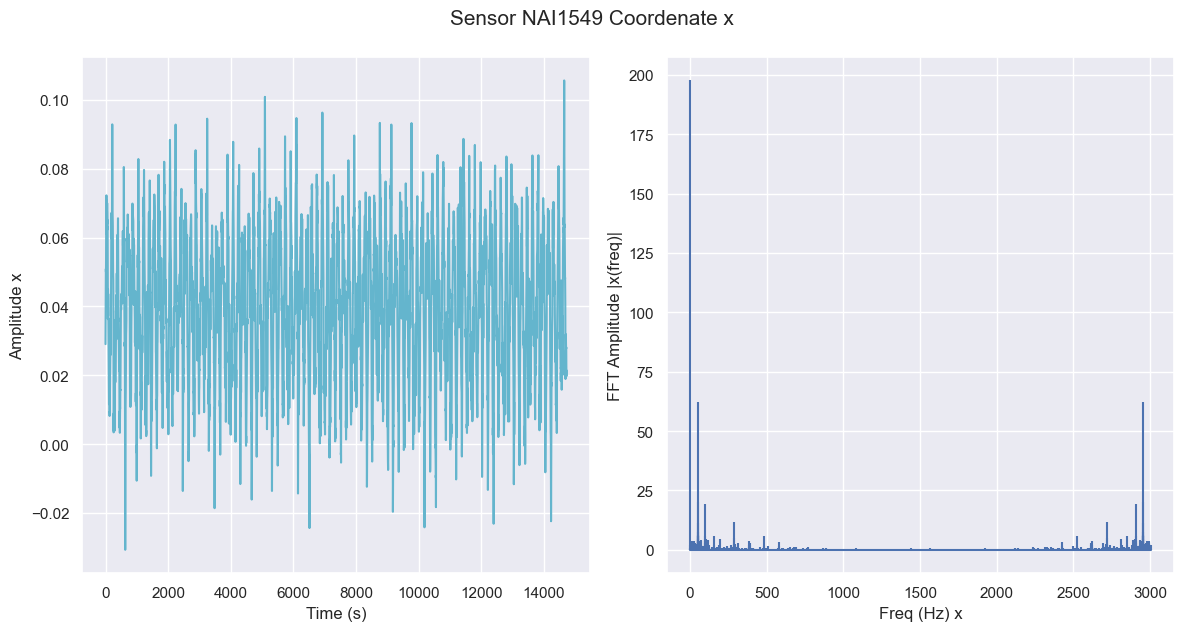

11


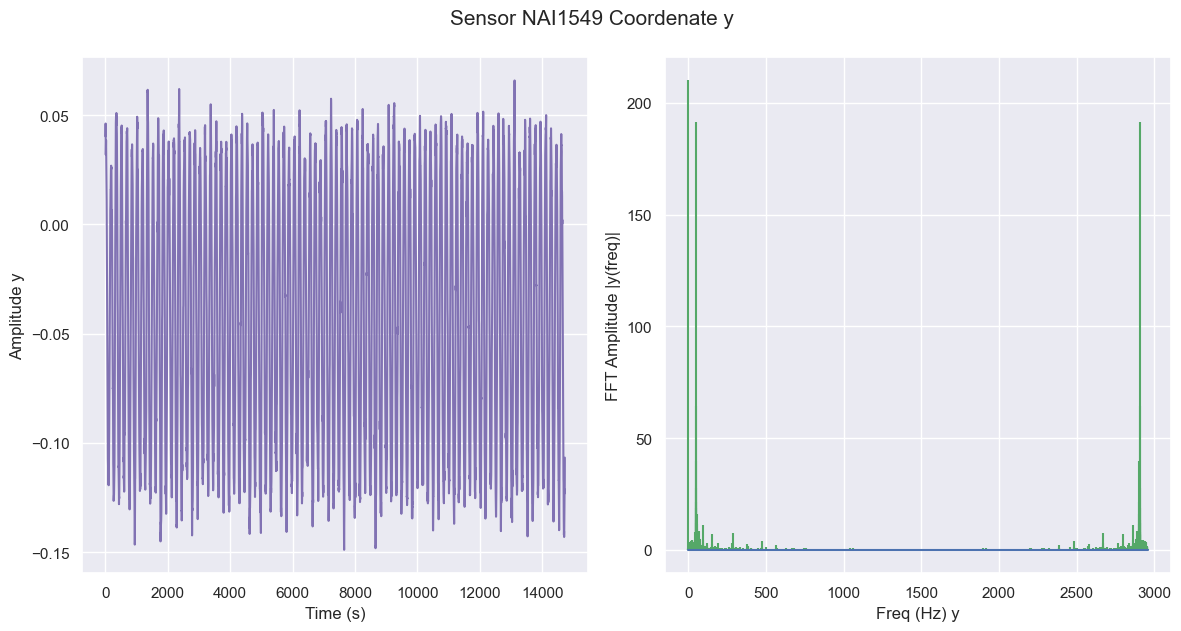

21


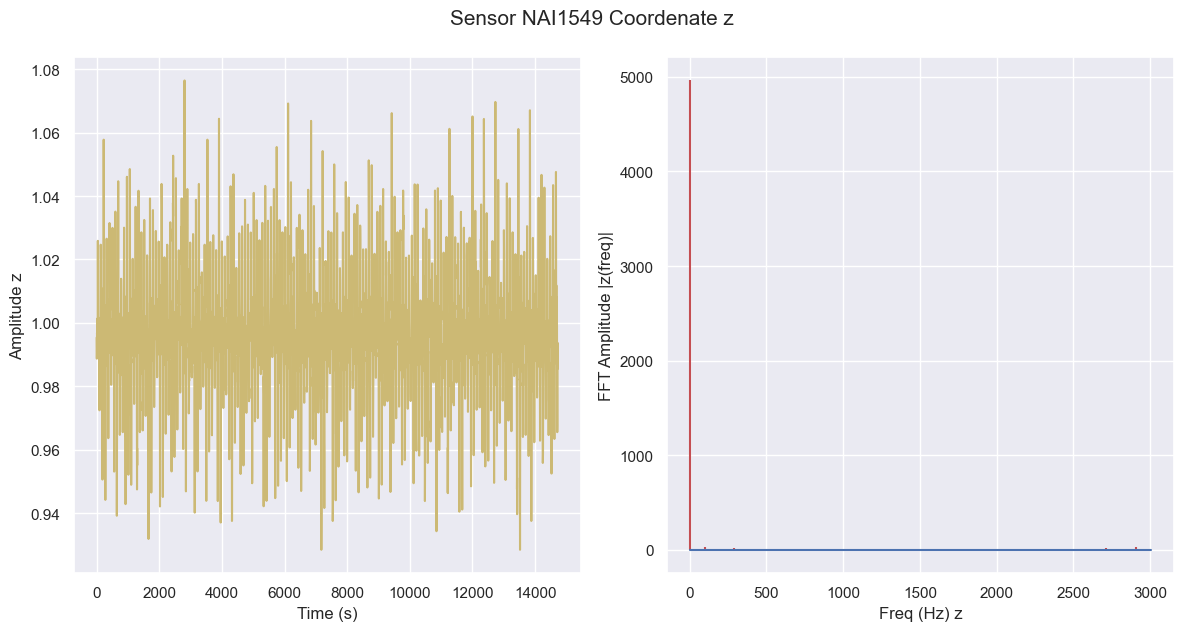

02


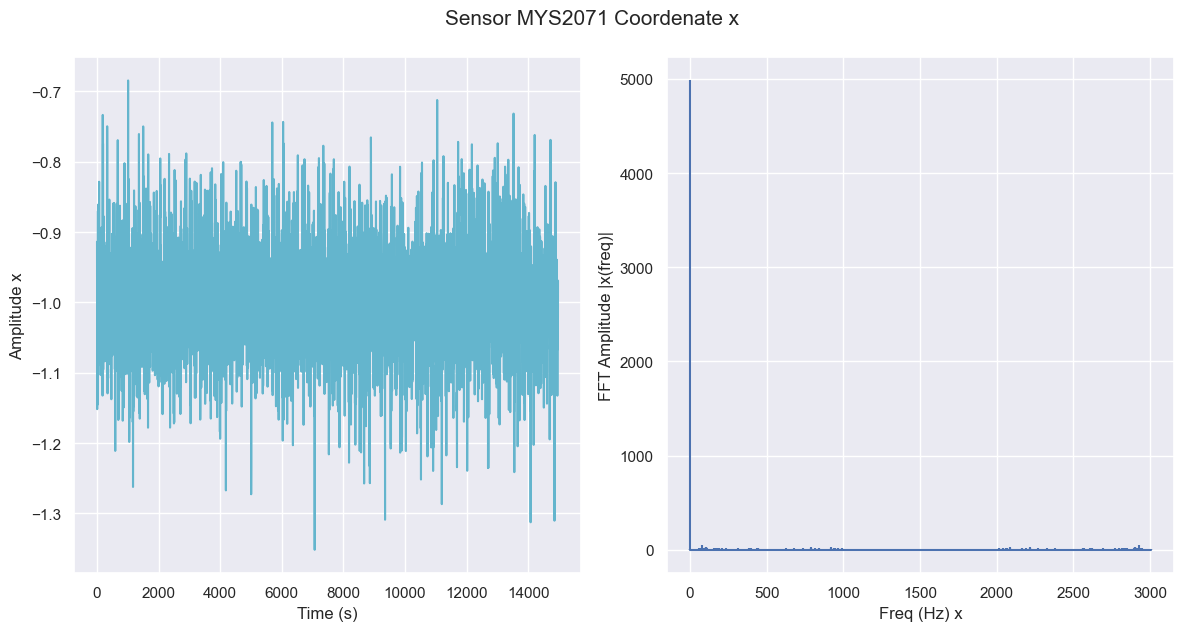

12


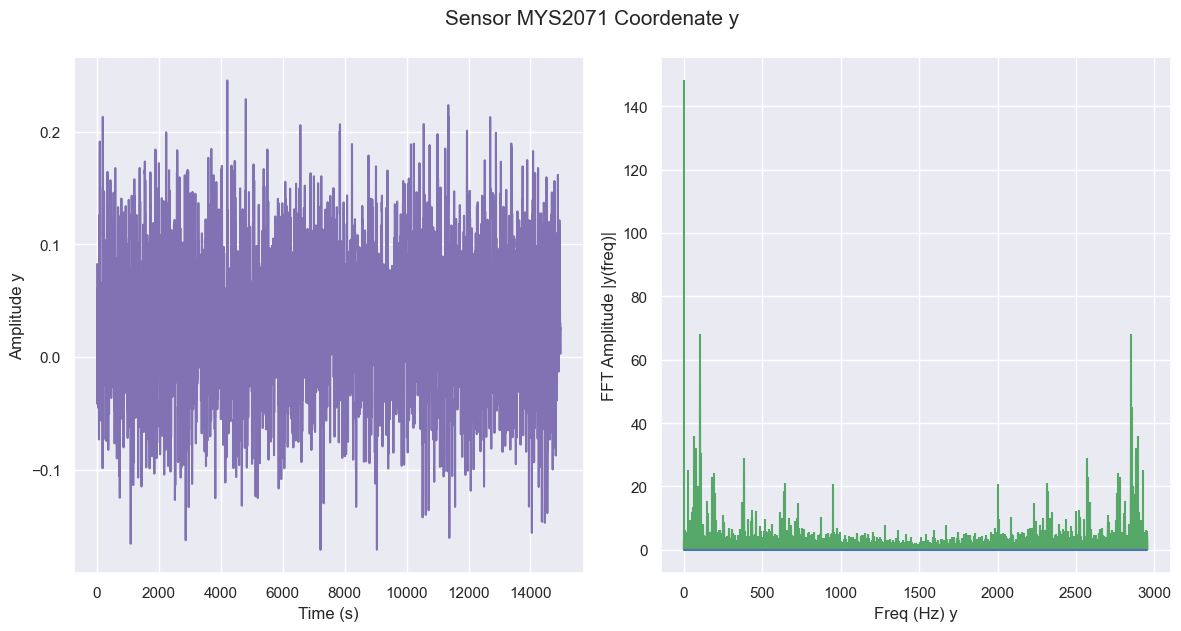

22


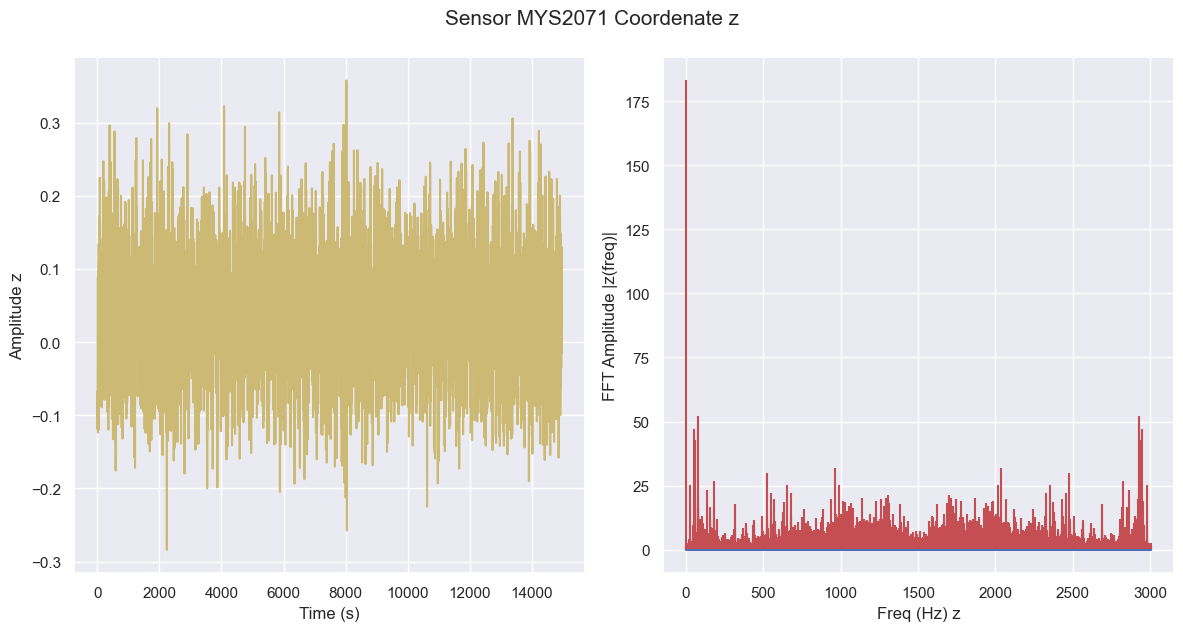

03


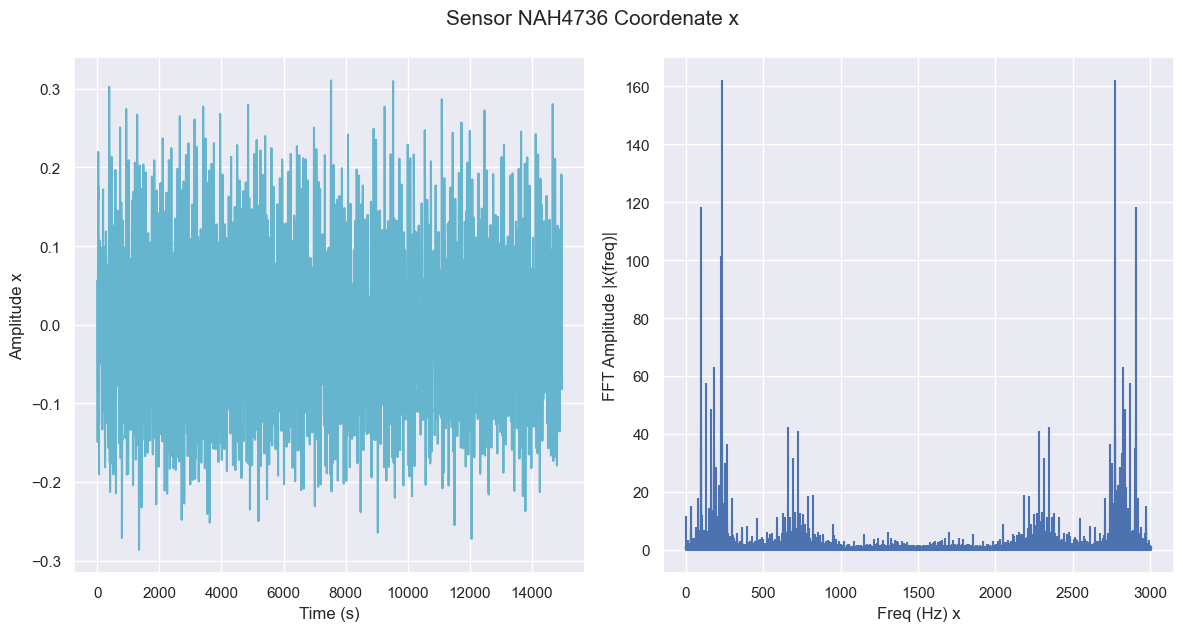

13


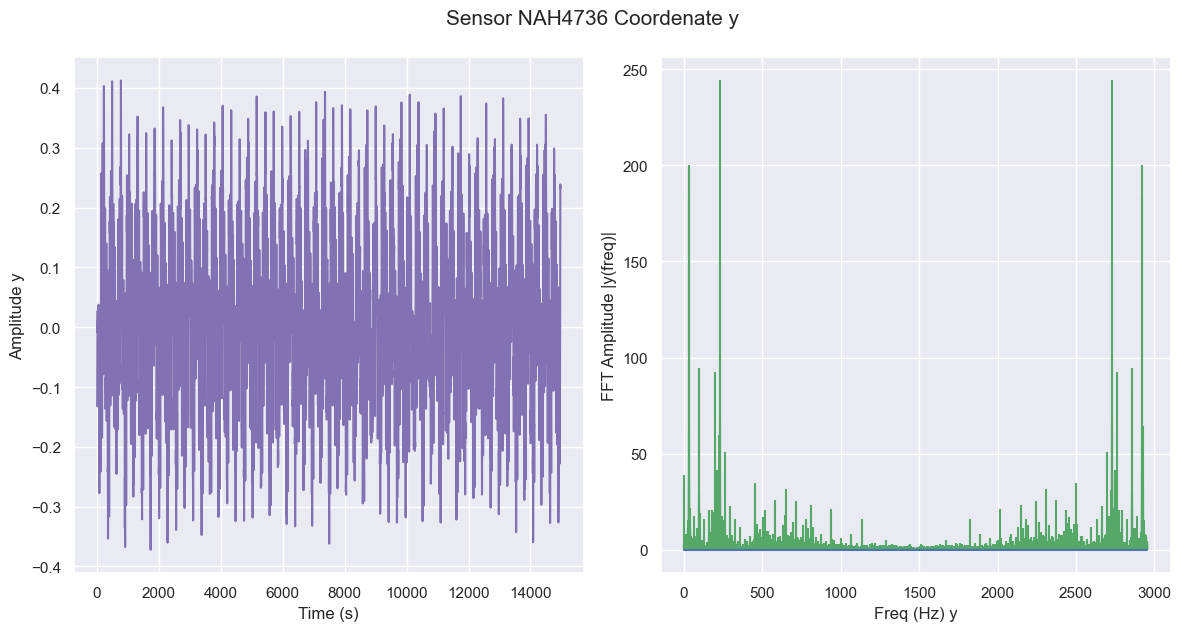

23


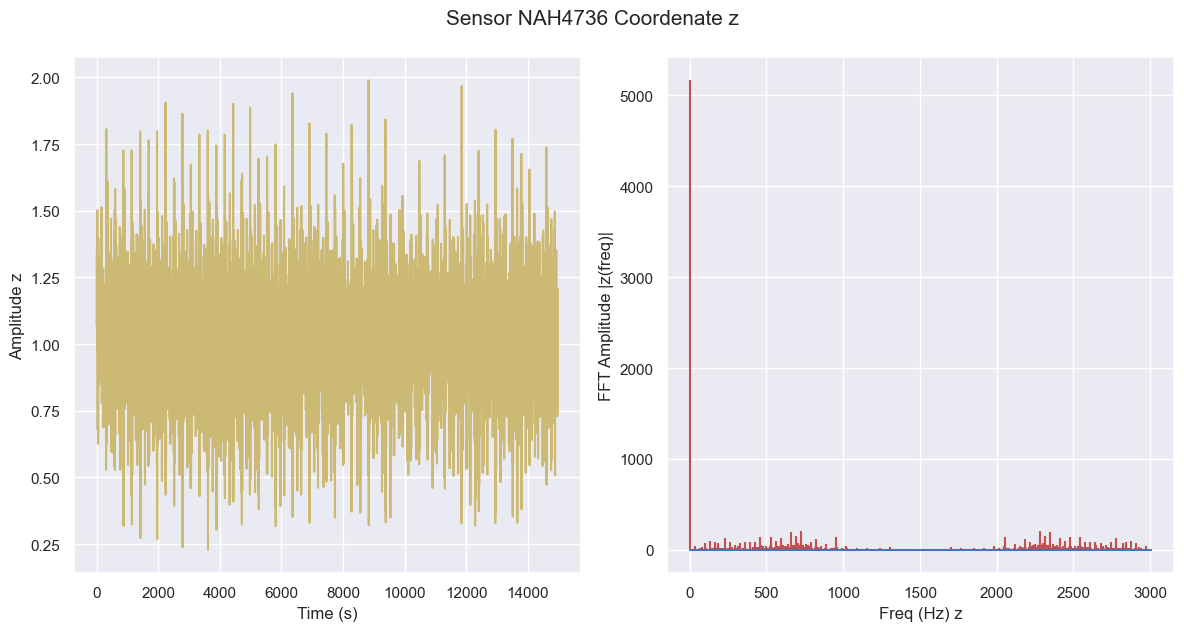

In [57]:
# PLOTs
lista=["x","y","z"]
colors = ["b","g","r"]
colors2 = ["c","m","y"]
dir_list=glob.glob('*.csv')
for j in range(len(dir_list)):
    for i in range(len(lista)):
        print(str(i) + str(j))
        x = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],lista[i]]
        X = fft(x)
        N = len(X)
        t = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],"time"]
        sr = int(dir_list[i][11:15])
        n = np.arange(N)
        T = N/sr
        freq = n/T 

        plt.figure(figsize = (12, 6))
        plt.subplot(122)

        plt.stem(freq, np.abs(X), colors[i], \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz) ' + lista[i])
        plt.ylabel('FFT Amplitude |' + lista[i]+'(freq)|')
        #plt.xlim(-5, 100)

        plt.subplot(121)
        plt.plot(t, ifft(X), colors2[i])
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude '+ lista[i])
        plt.tight_layout()
        plt.suptitle("Sensor "+dir_list[j][16:23]+" Coordenate "+ lista[i], fontsize=15,x=0.5,y=1.05)
        plt.show()

In [ ]:
# FILTER


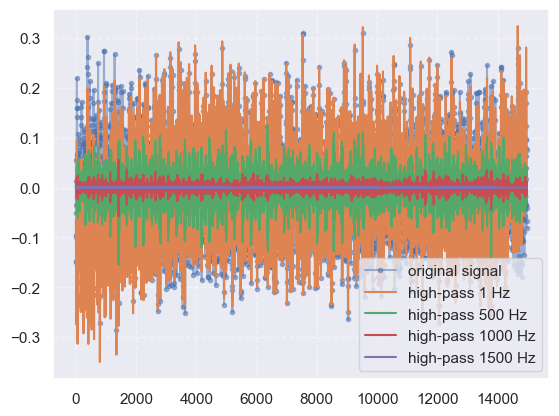

In [56]:
import numpy as np
import scipy.signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
j=3
i=0
# Load sample data from a WAV file
#sample_rate, data = scipy.io.wavfile.read('ecg.wav')
#times = np.arange(len(data))/sample_rate
data = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],lista[i]]
times = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],"time"]
sample_rate = int(dir_list[i][11:15])
# Plot the original signal
plt.plot(times, data, '.-', alpha=.5, label="original signal")

# Plot the signal low-pass filtered using different cutoffs
for cutoff in [1,500,1000,1500]:
    sos = scipy.signal.butter(5, cutoff, 'highpass', fs=sample_rate, output='sos')
    filtered = scipy.signal.sosfiltfilt(sos, data)
    plt.plot(times, filtered, label=f"high-pass {cutoff} Hz")

plt.legend()
plt.grid(alpha=.5, ls='--')
#plt.axis([0.35, 0.5, None, None])
plt.show()

00


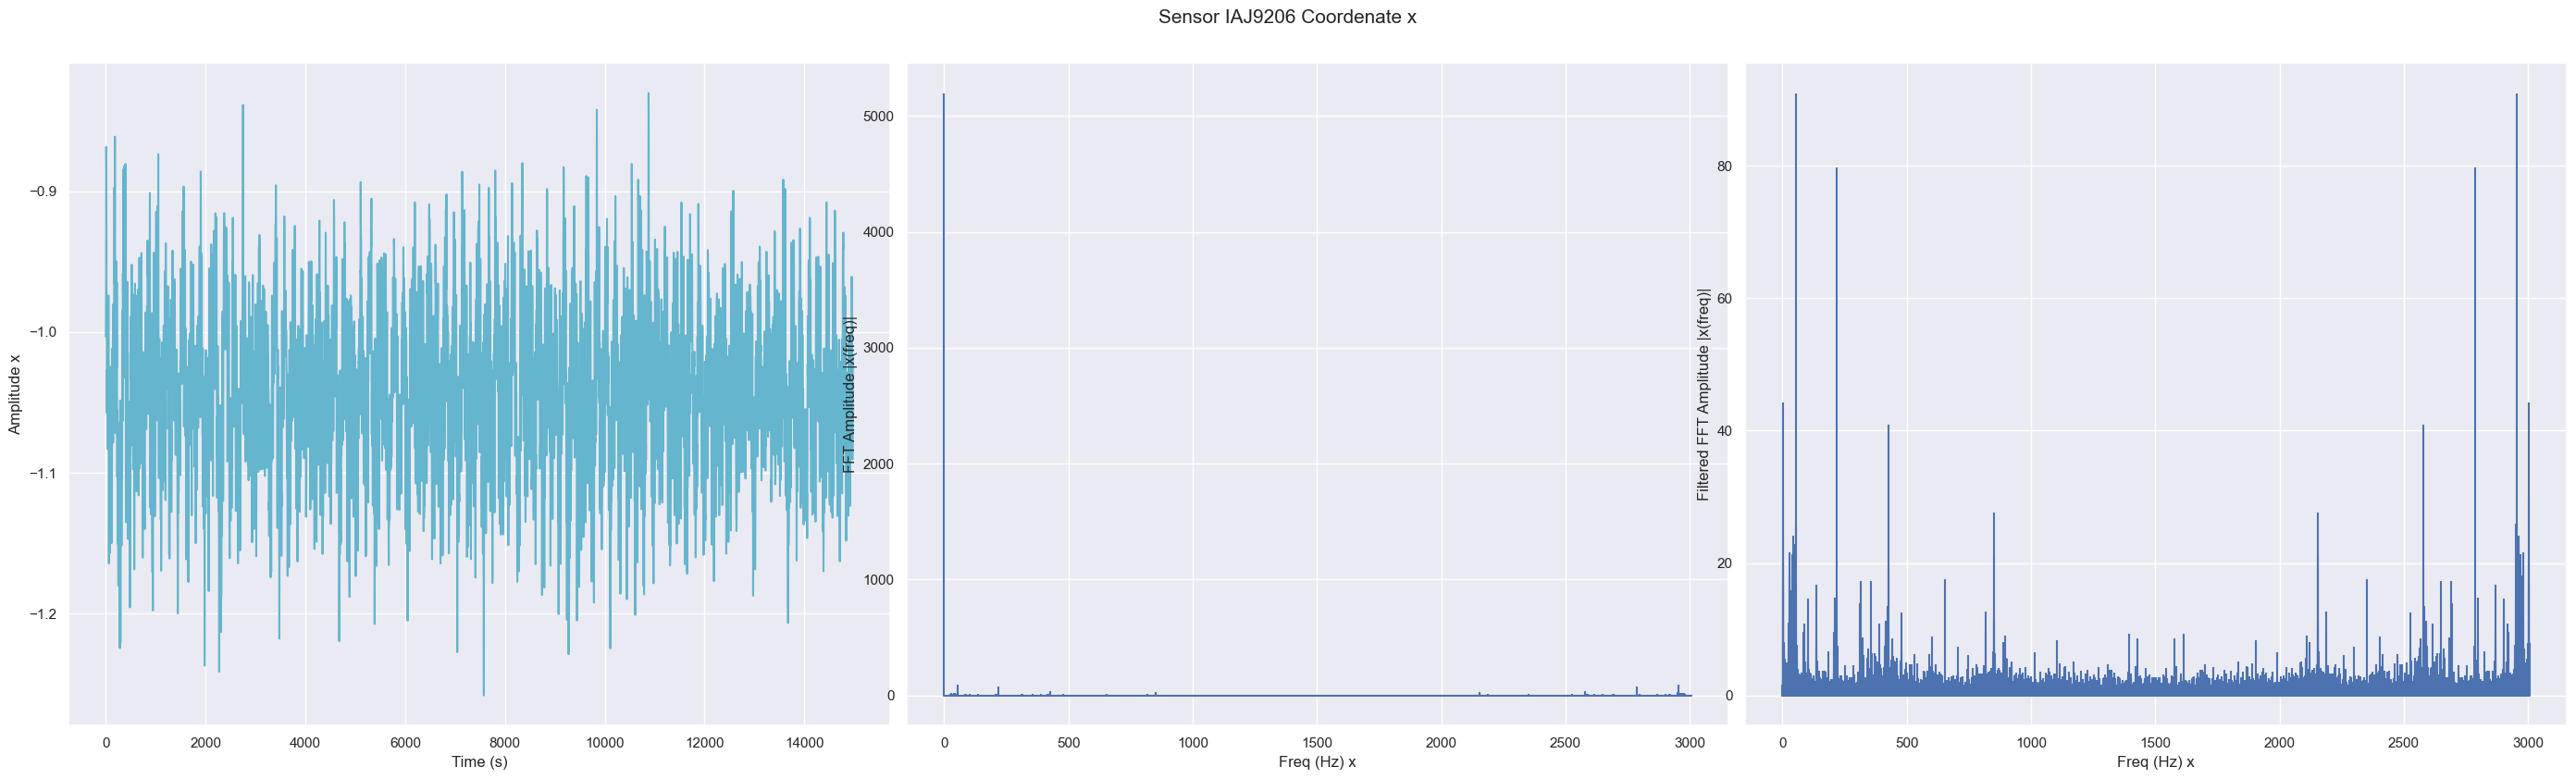

10


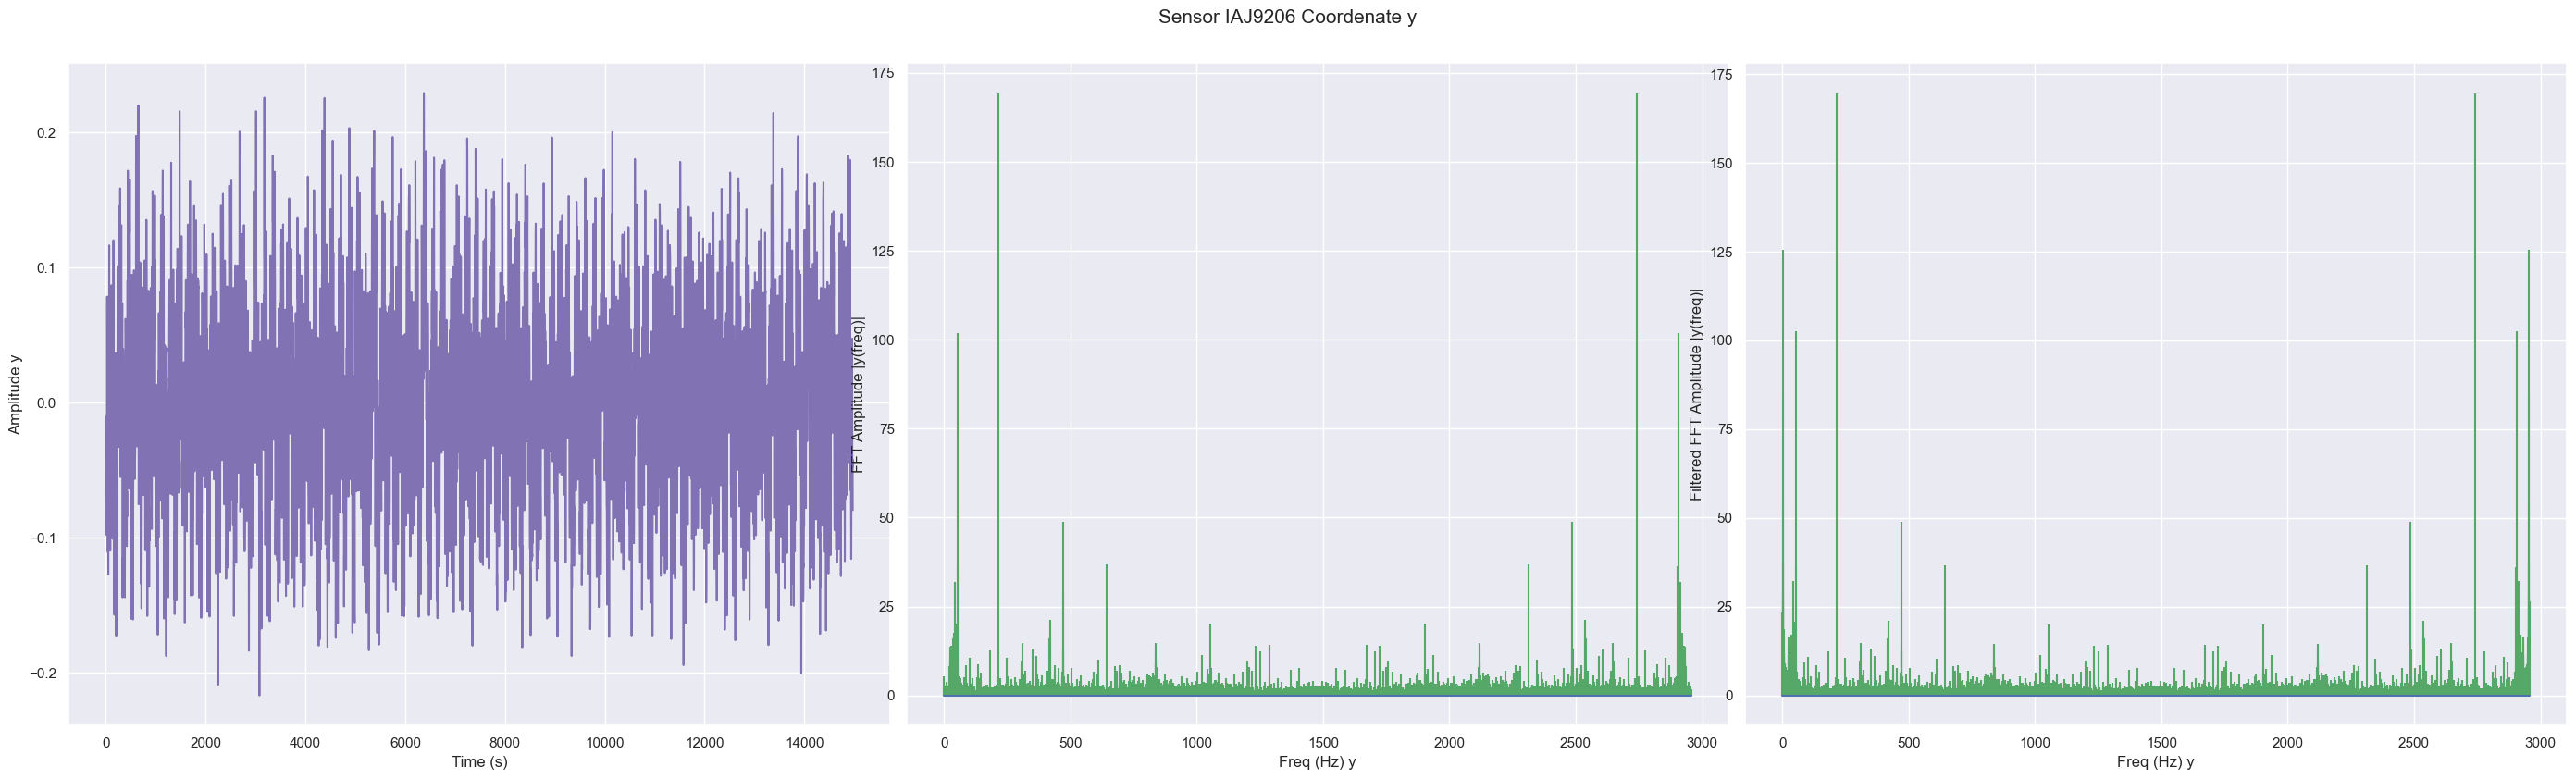

20


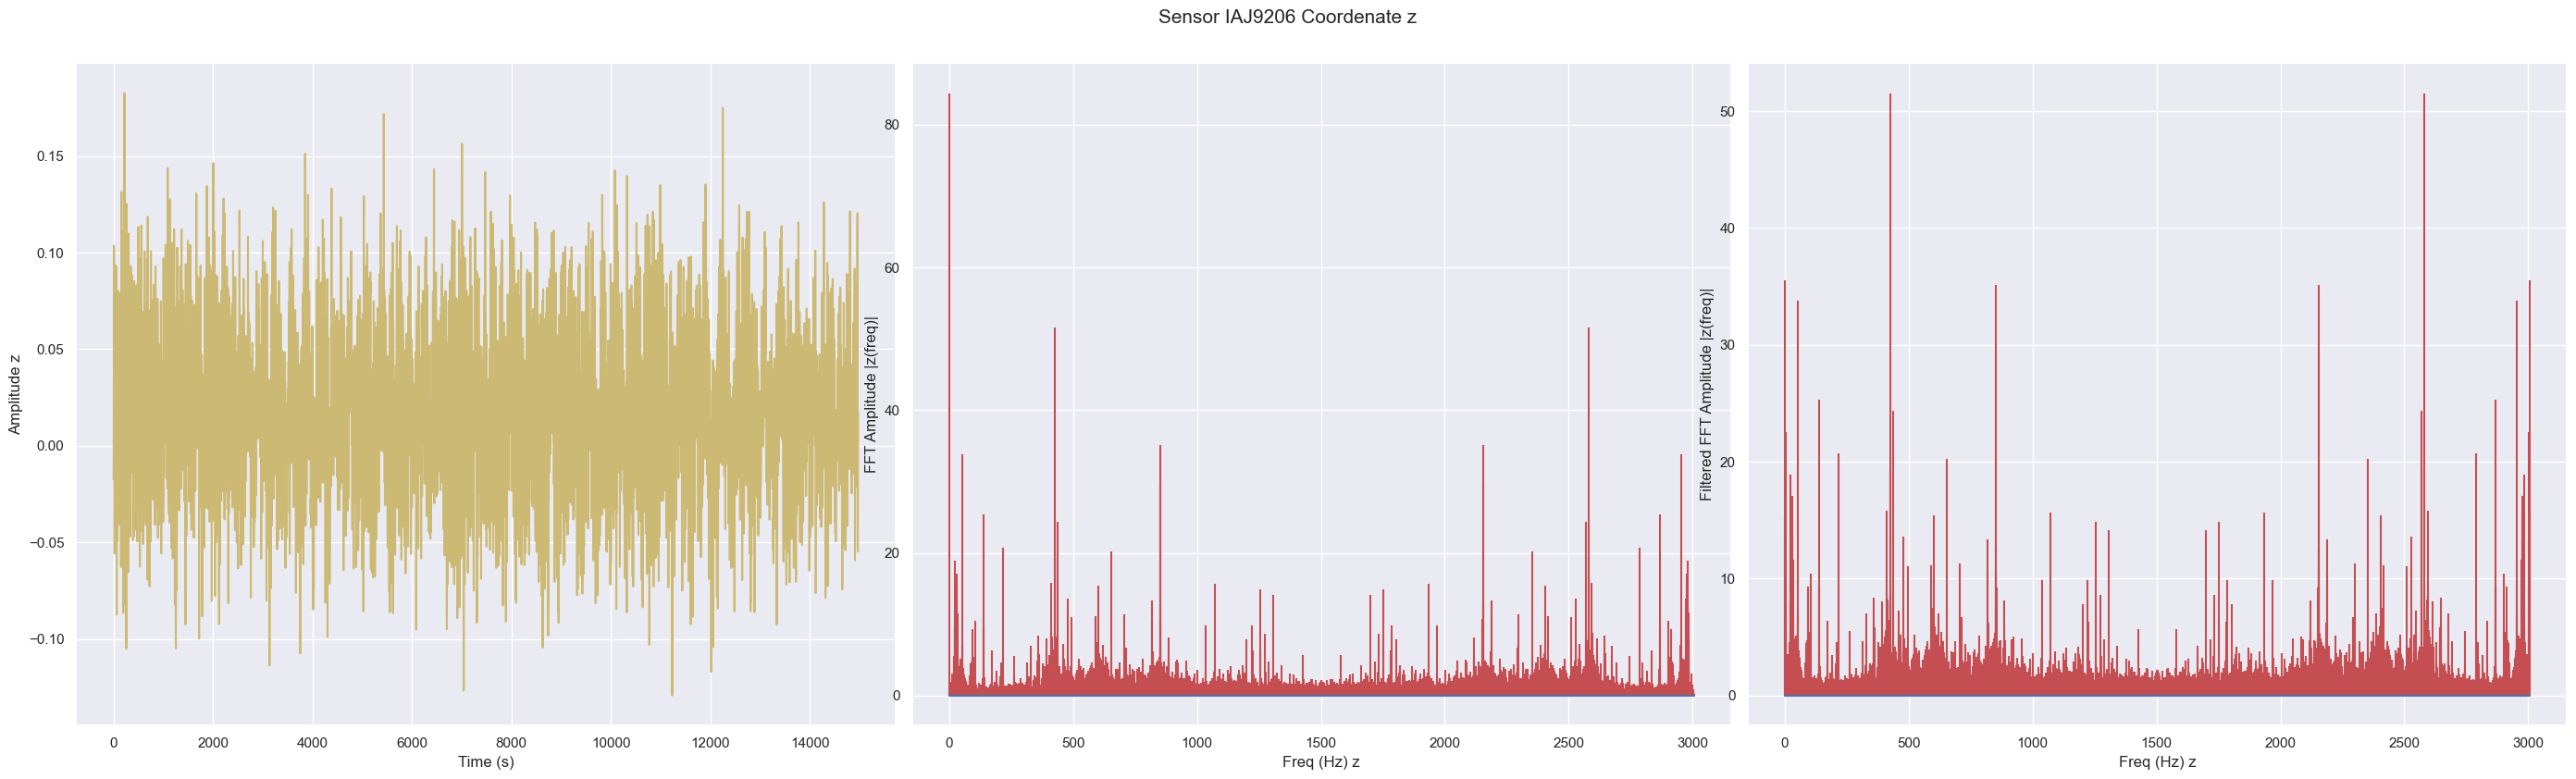

01


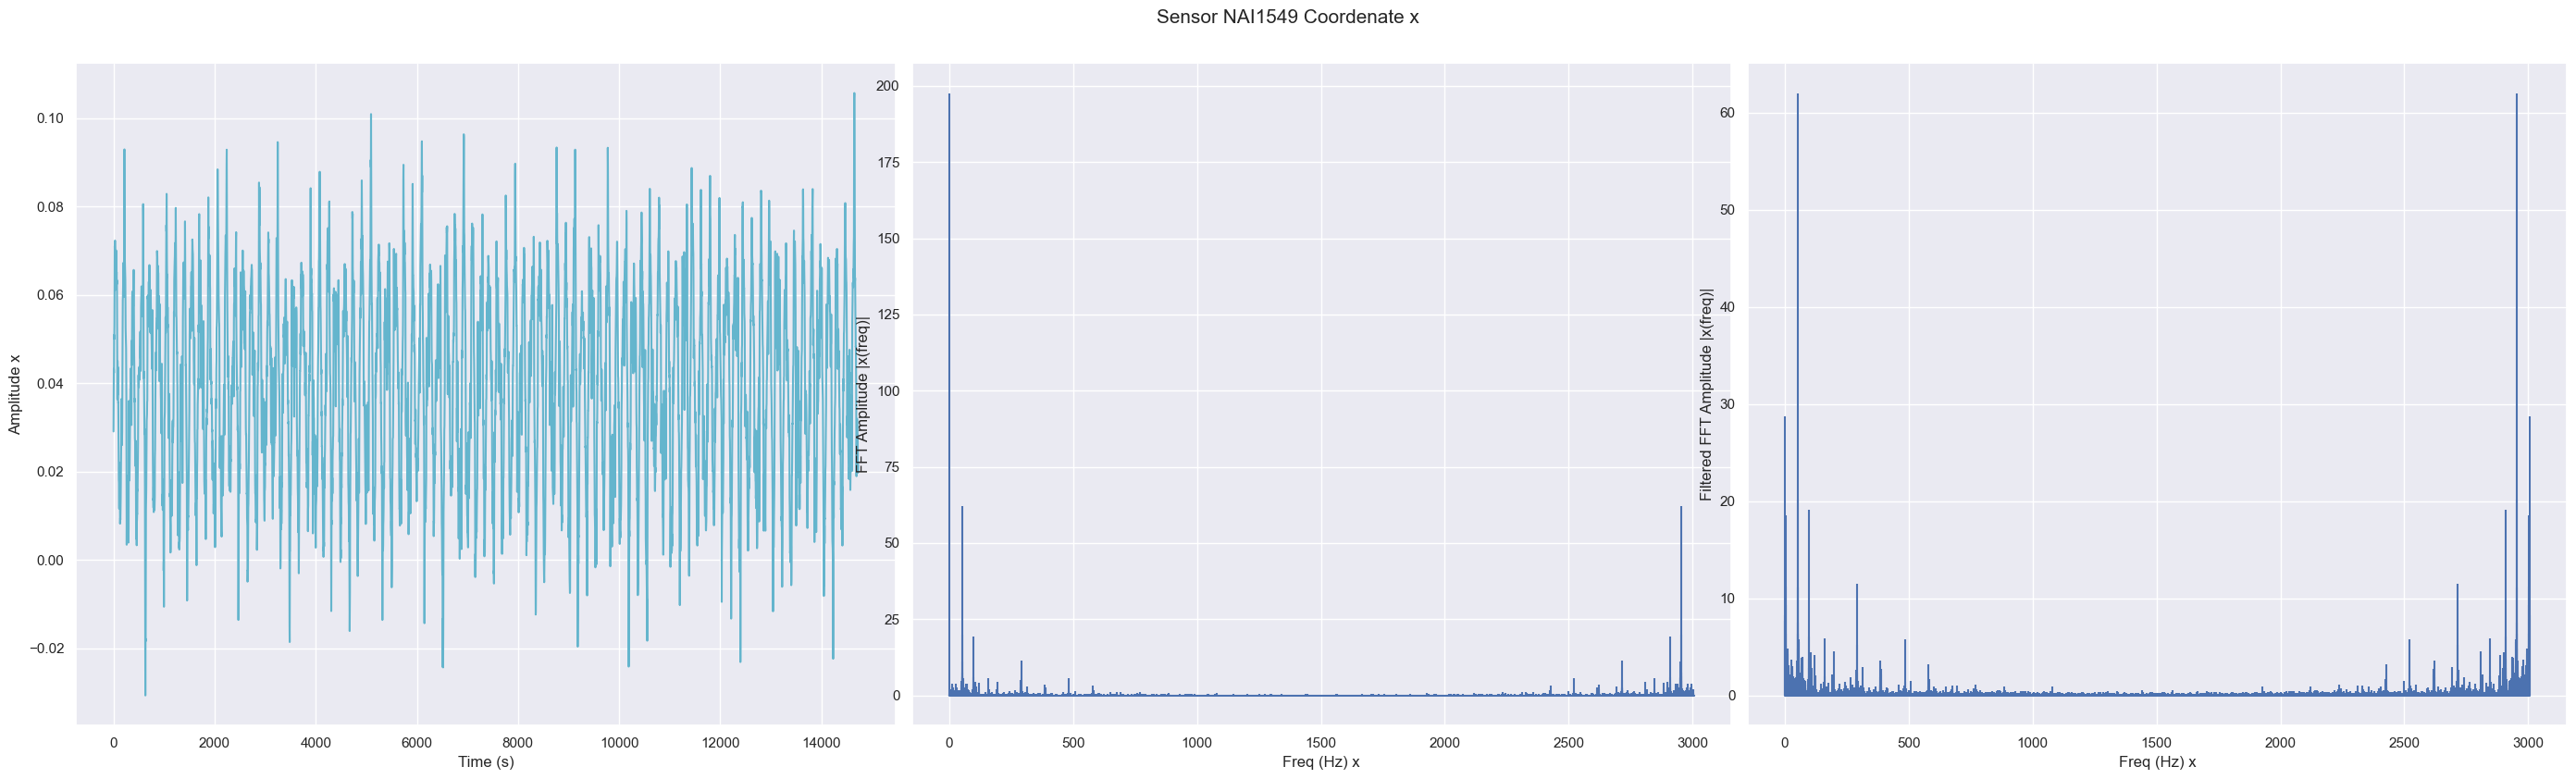

11


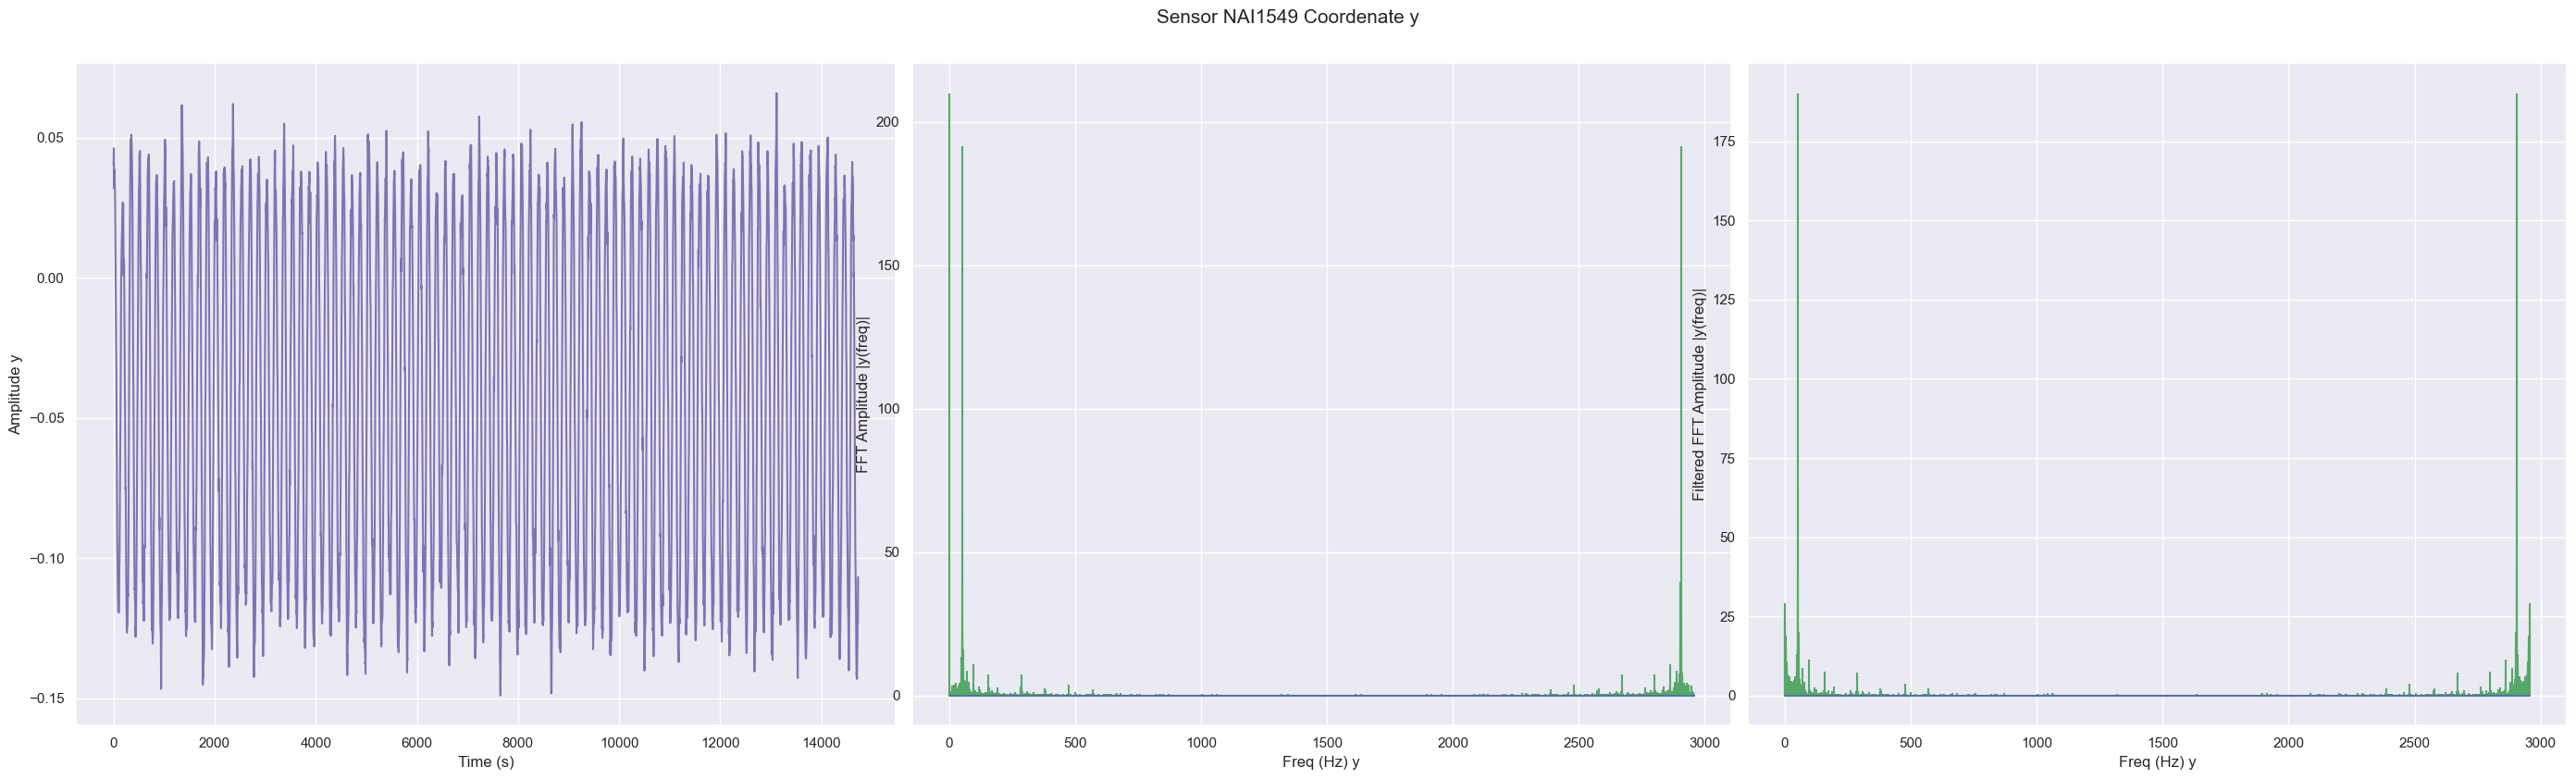

21


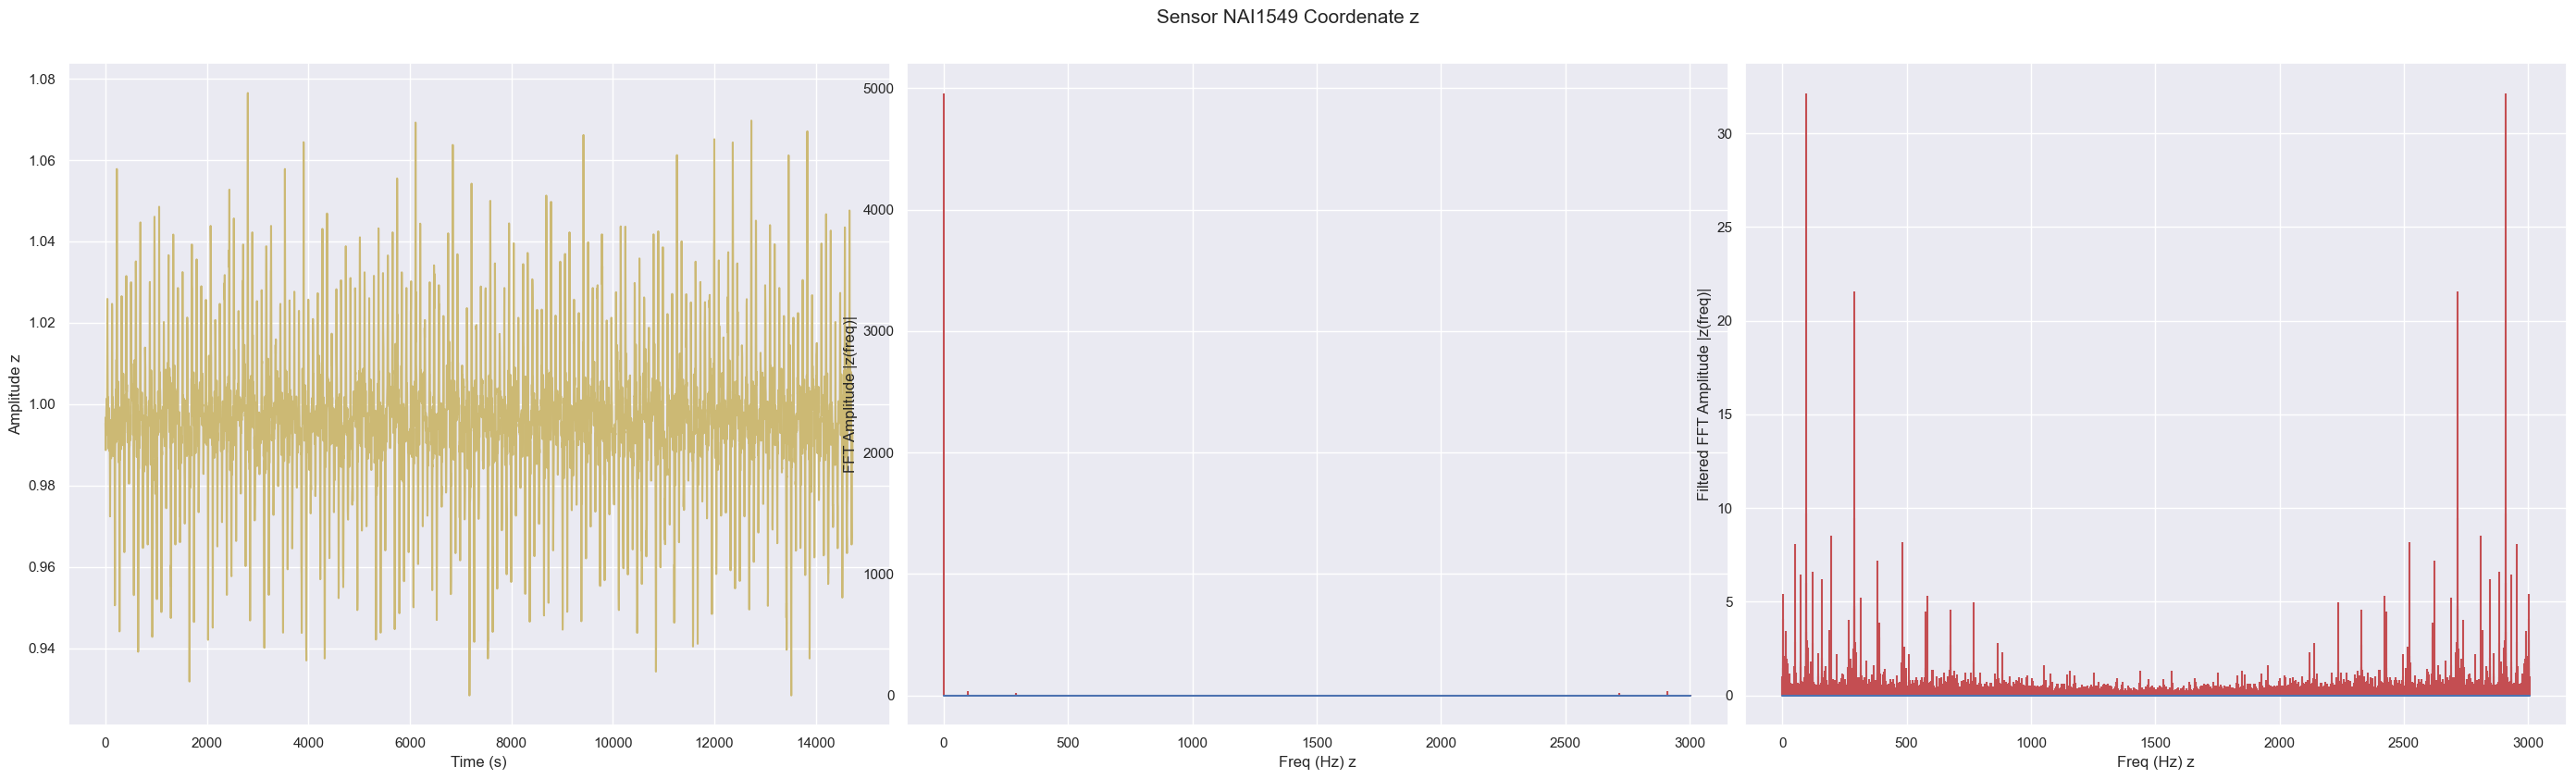

02


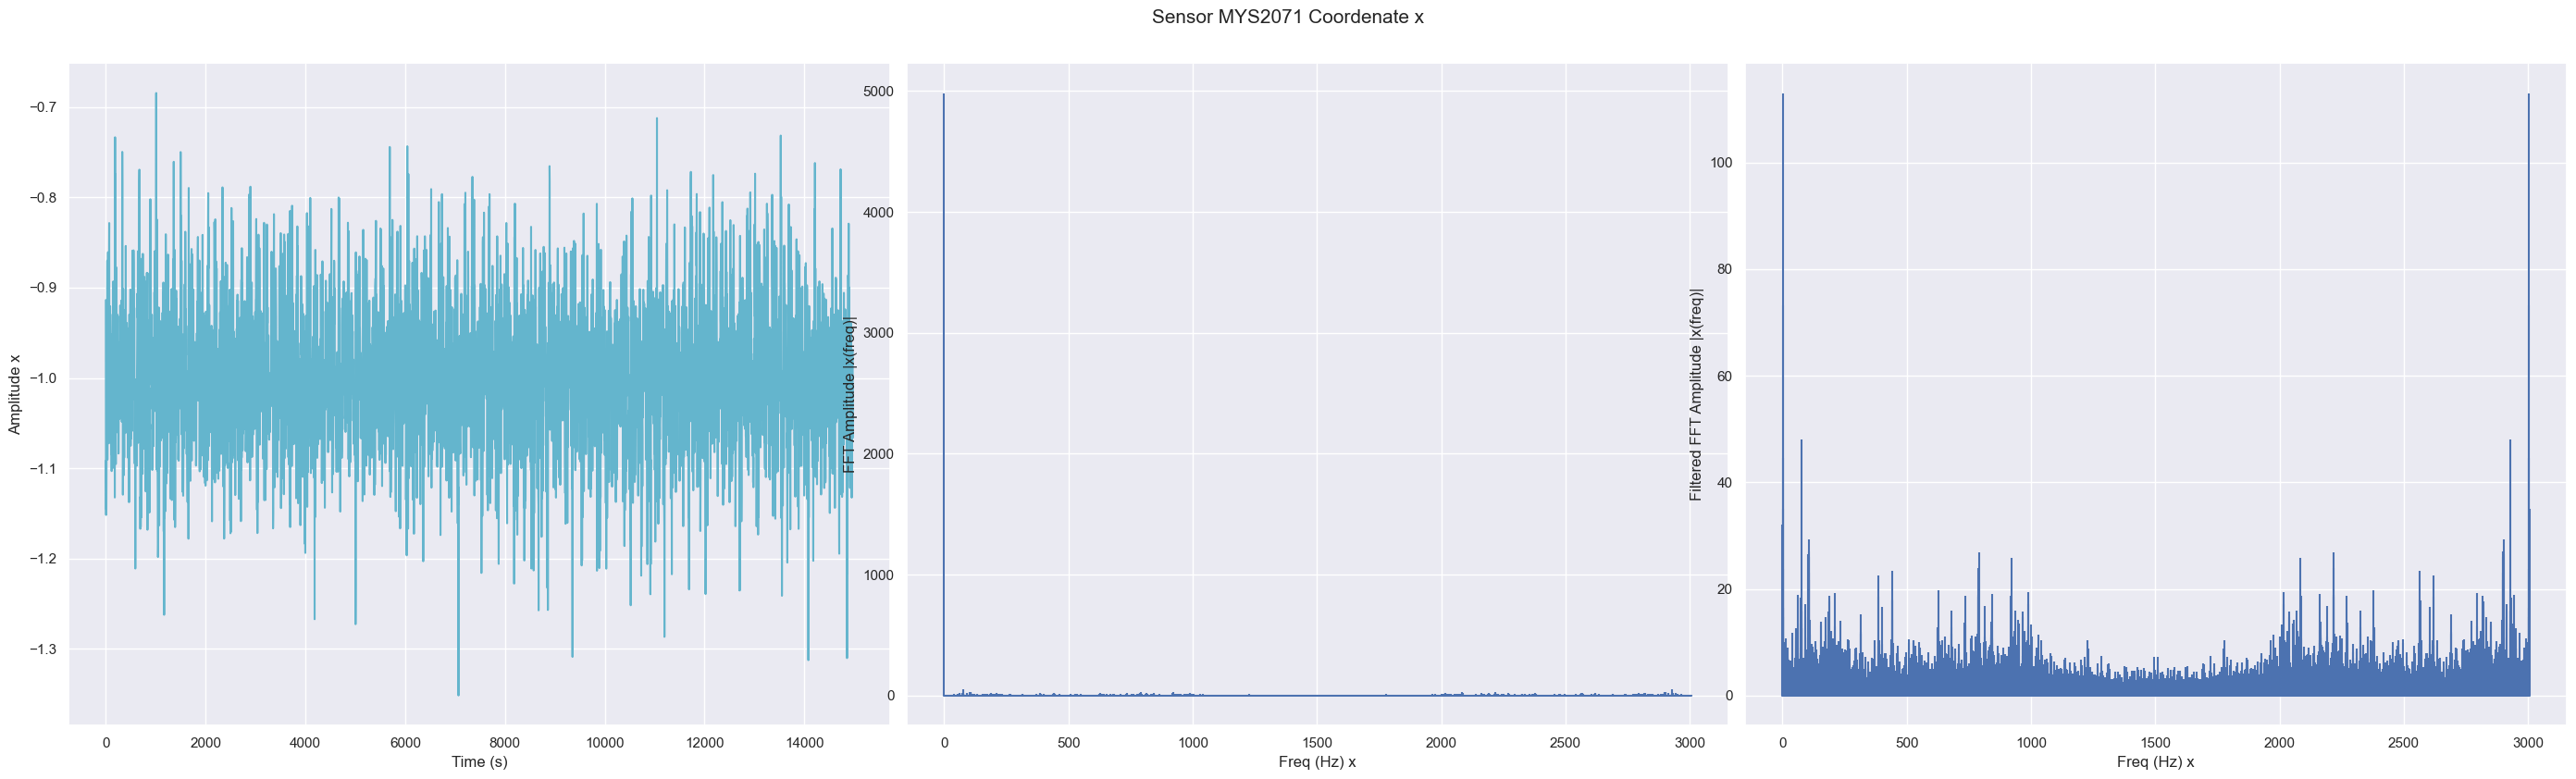

12


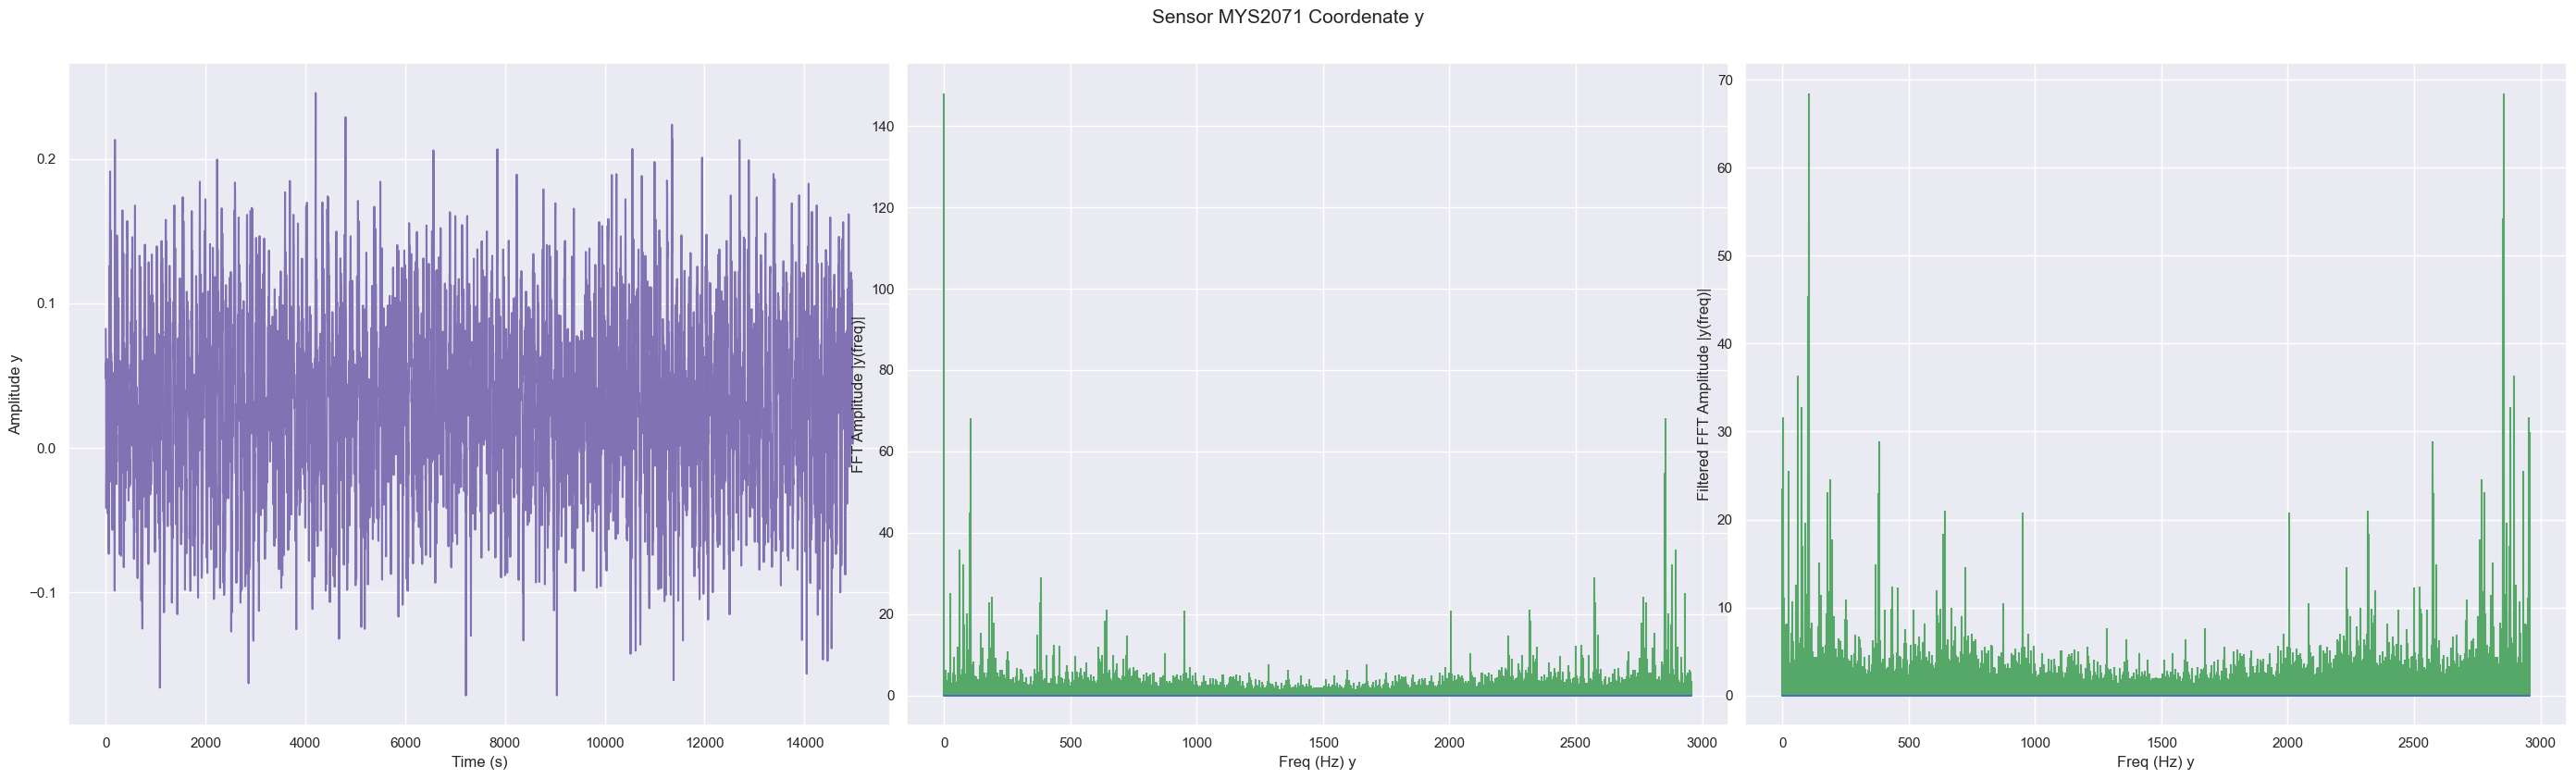

22


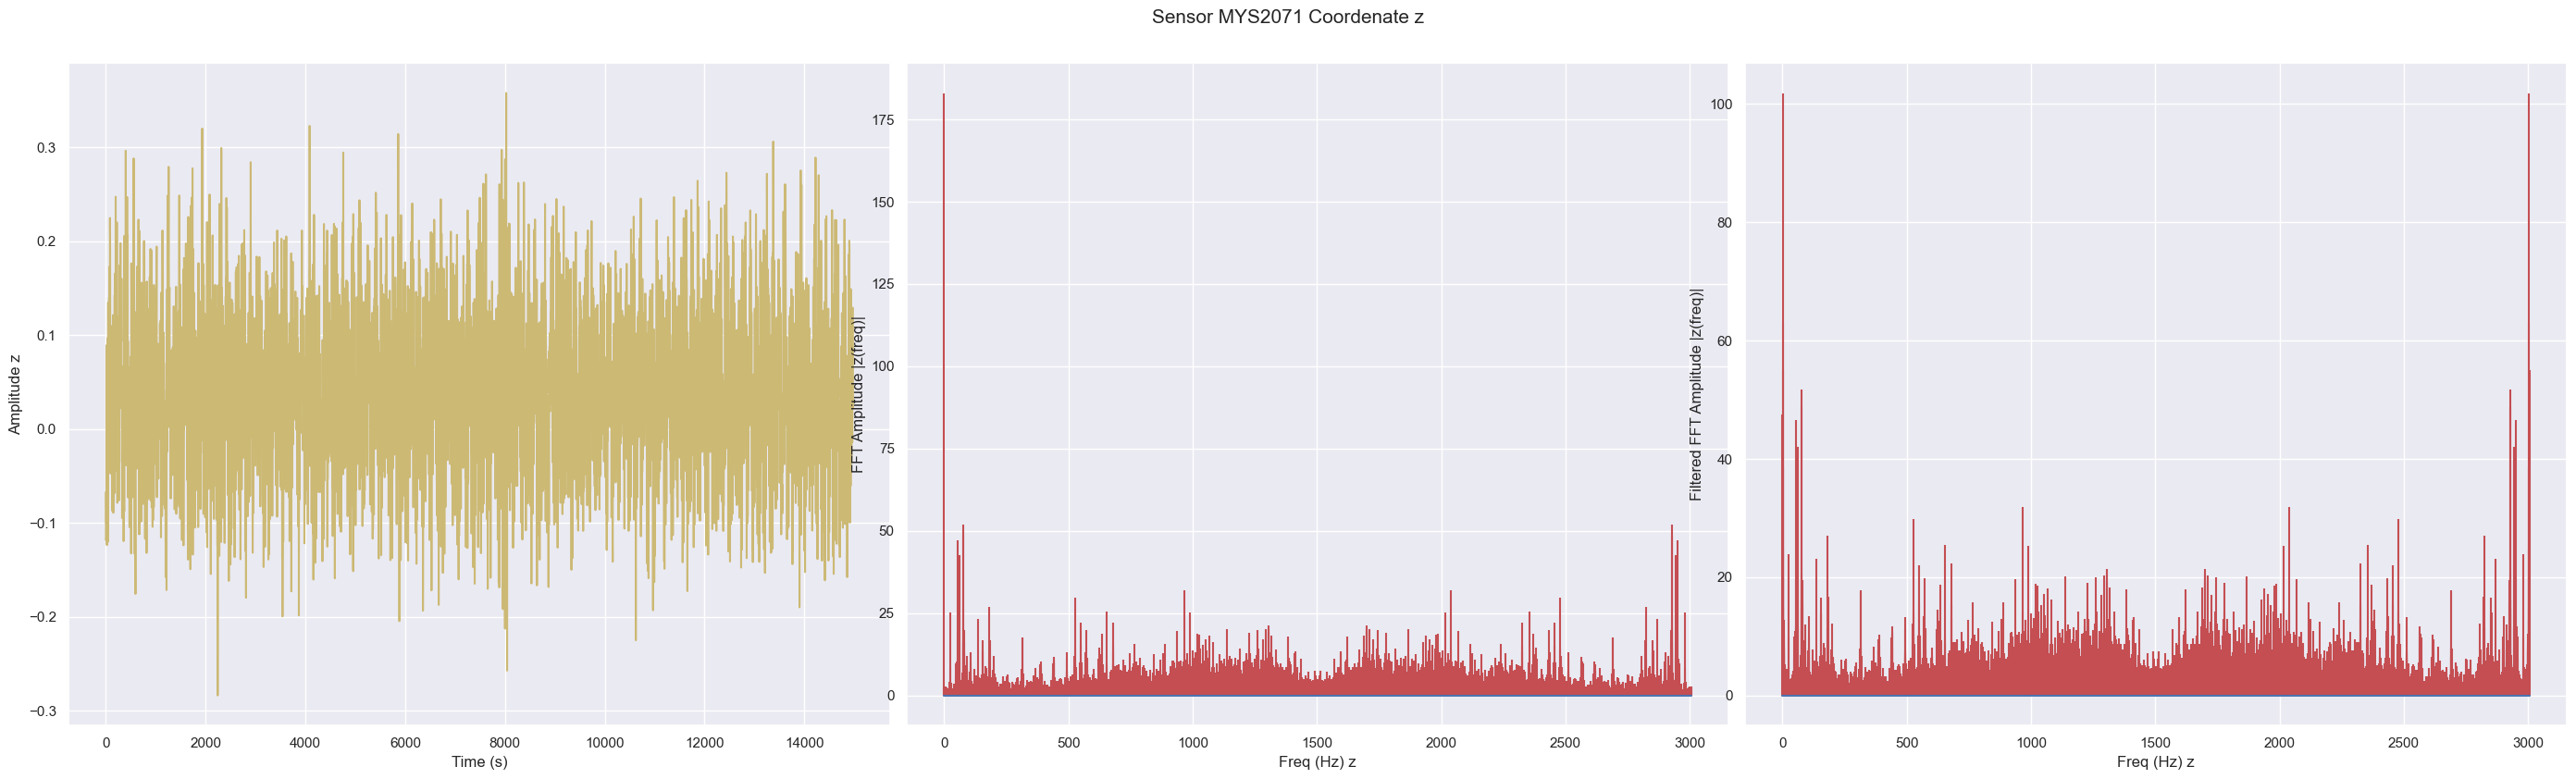

03


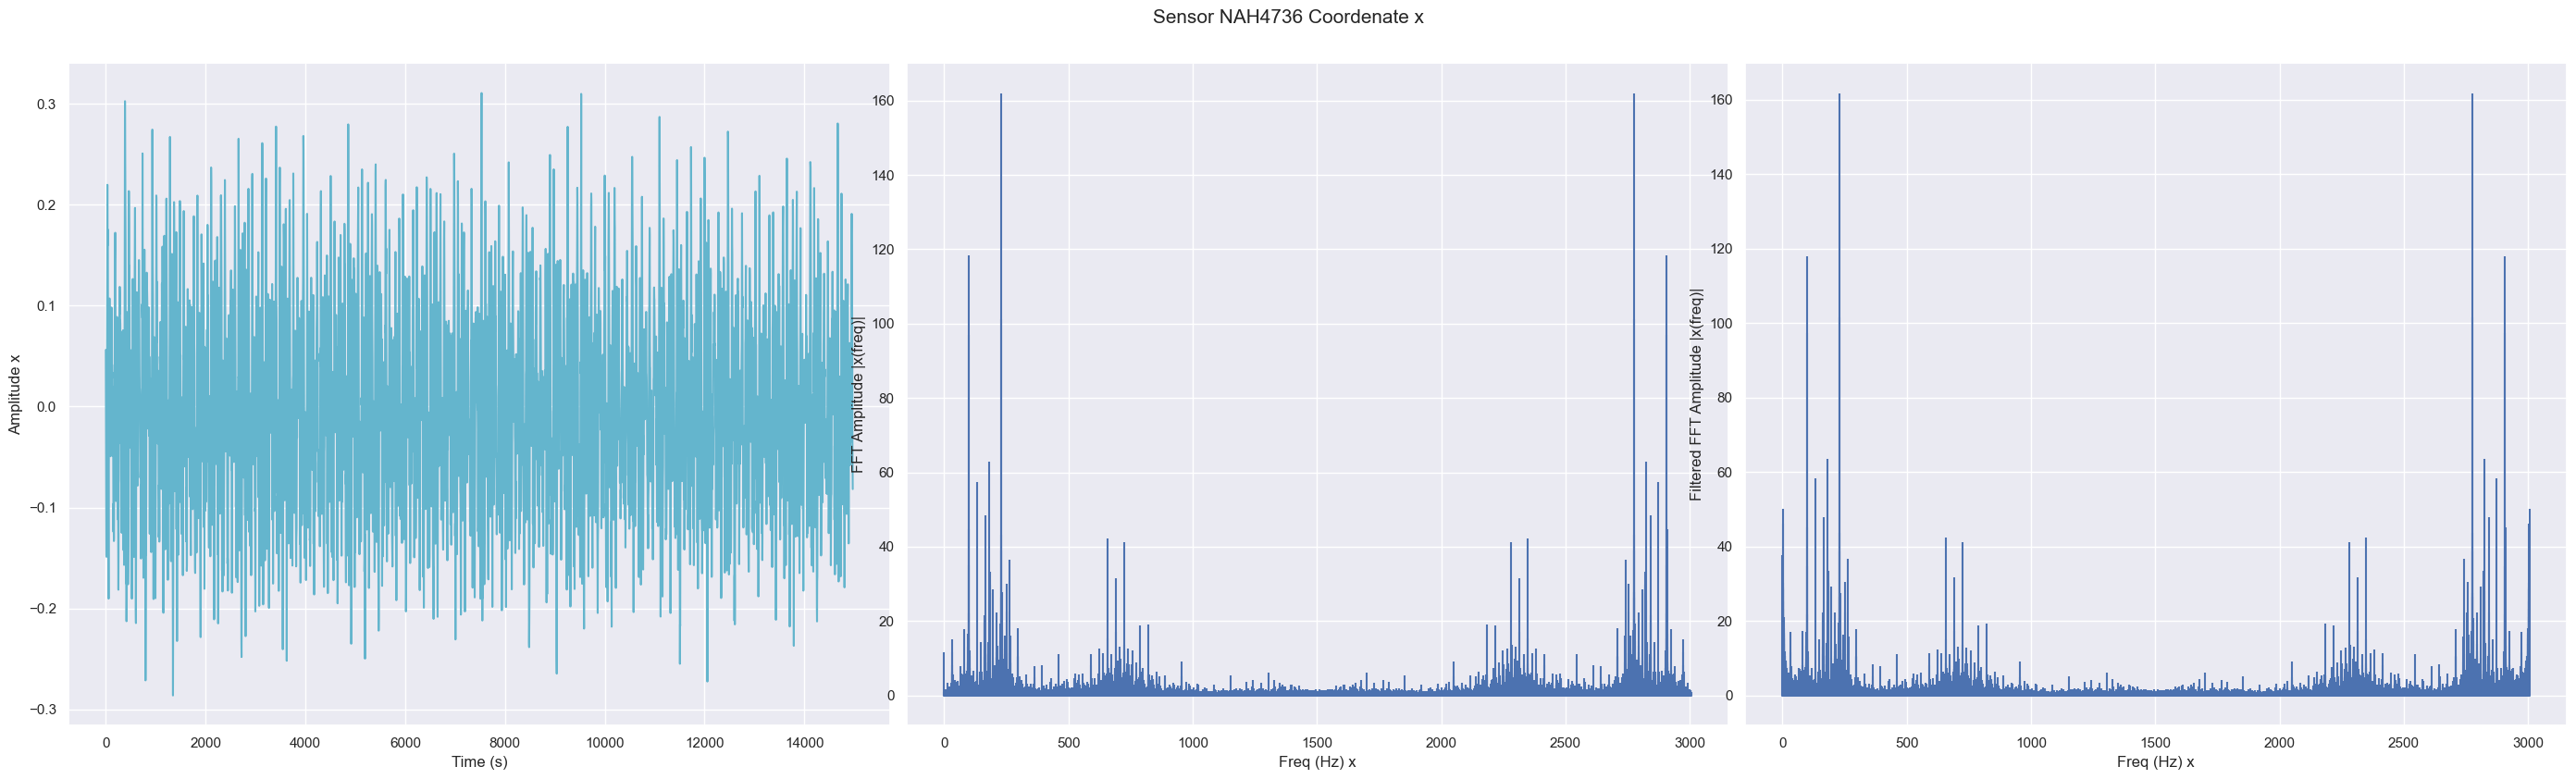

13


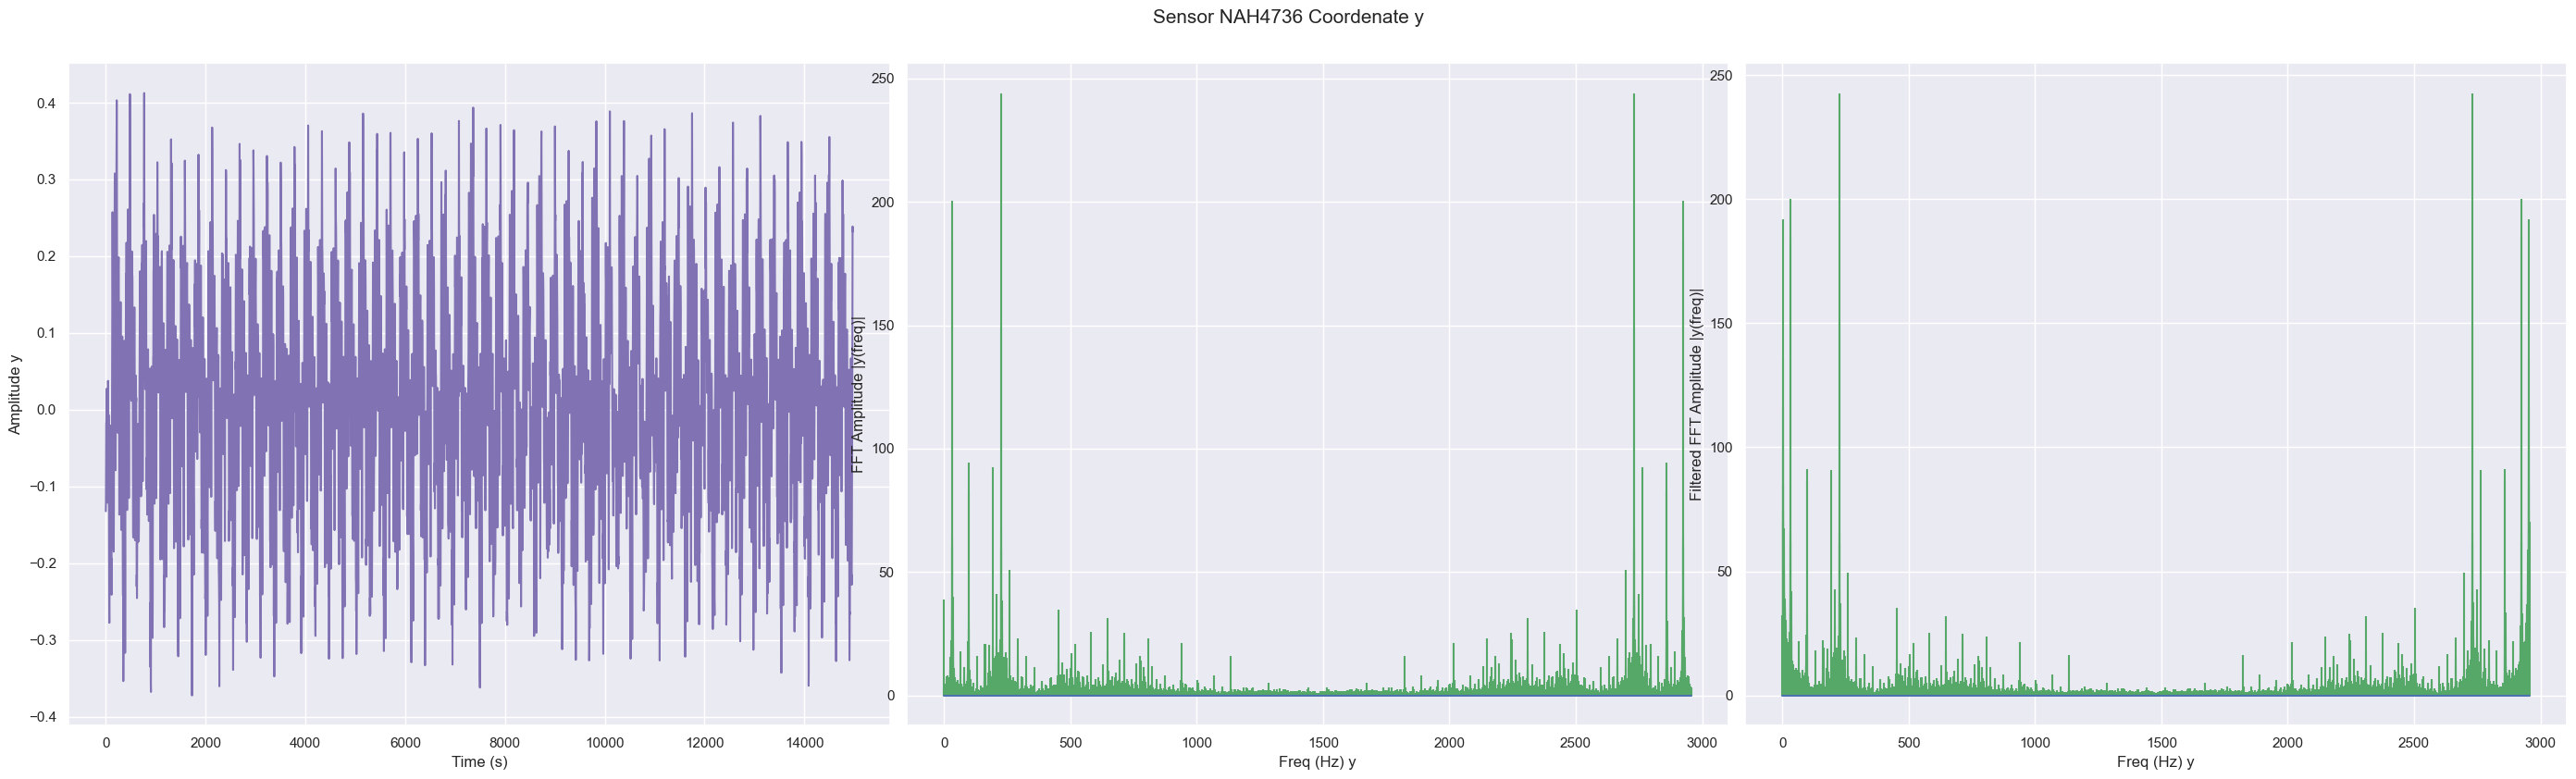

23


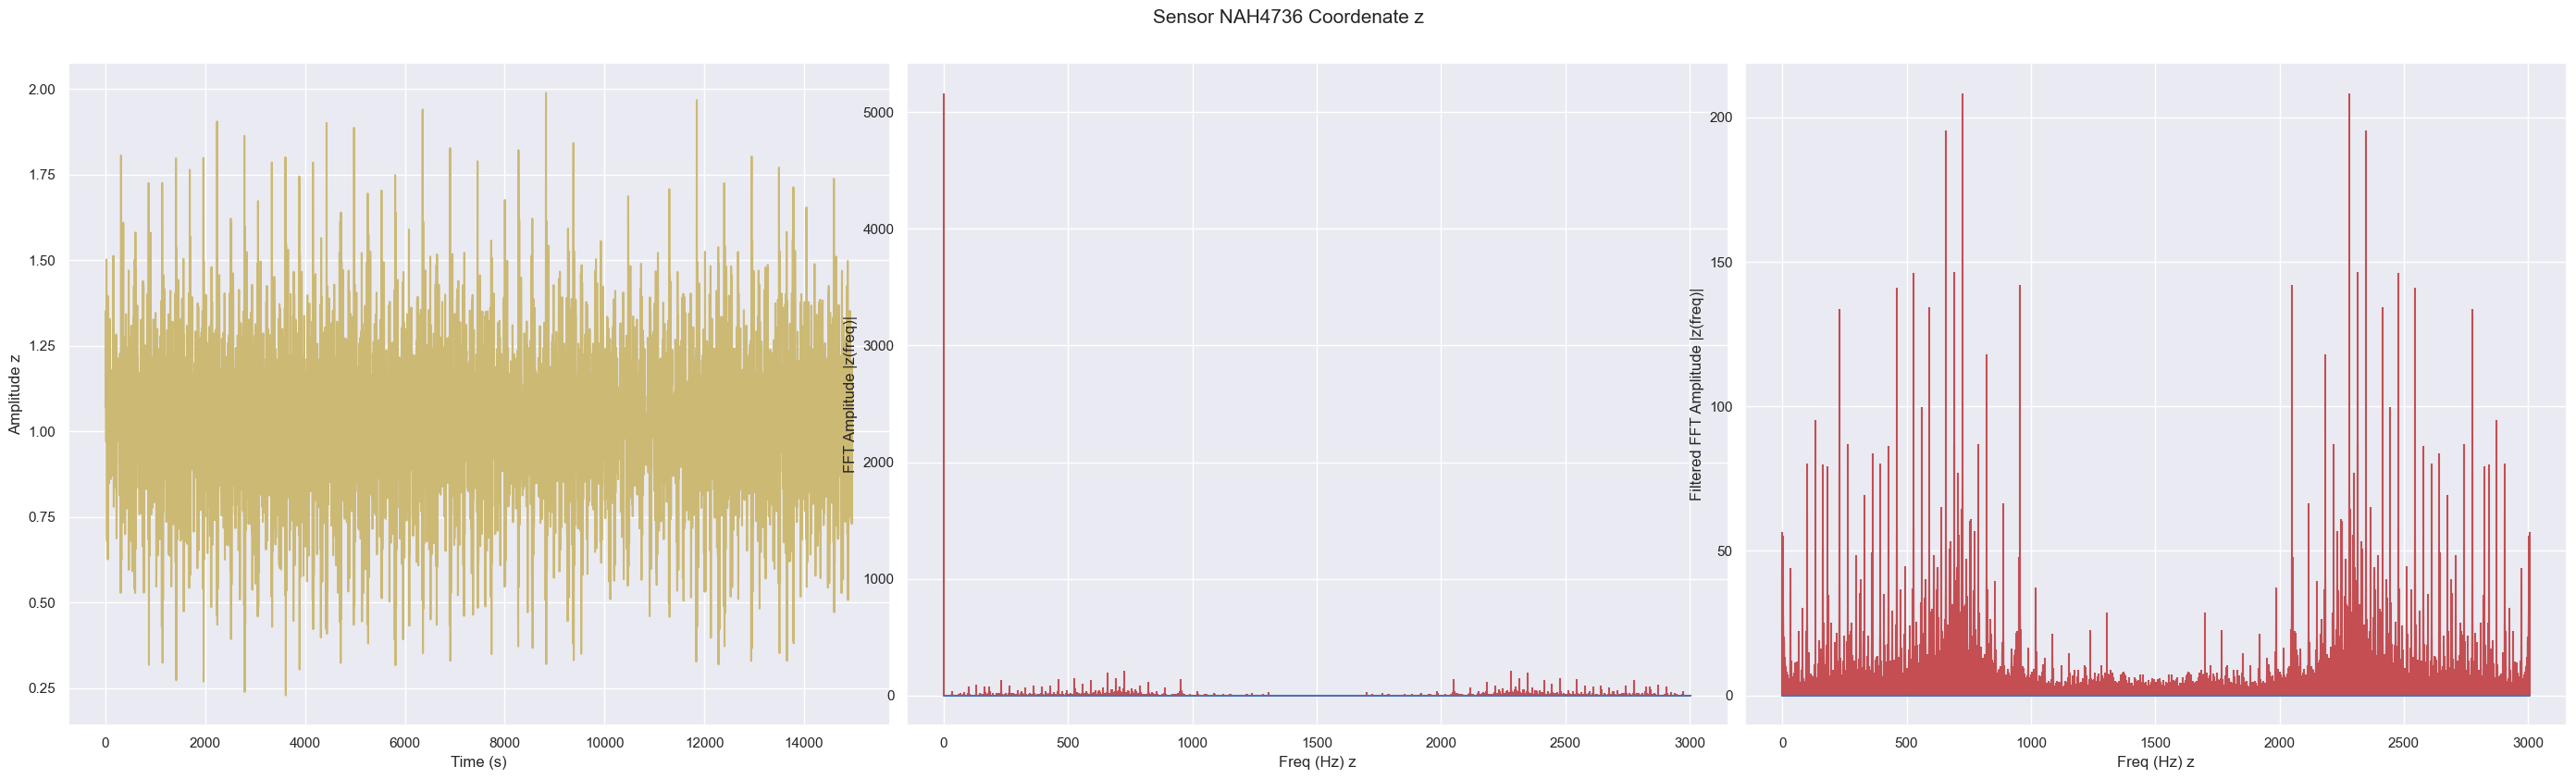

In [63]:
lista=["x","y","z"]
colors = ["b","g","r"]
colors2 = ["c","m","y"]
dir_list=glob.glob('*.csv')
for j in range(len(dir_list)):
    for i in range(len(lista)):
        print(str(i) + str(j))
        x = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],lista[i]]
        X = fft(x)
        N = len(X)
        t = DF_MAIN.loc[DF_MAIN["sensor_id"]==dir_list[j][16:23],"time"]
        sr = int(dir_list[i][11:15])
        n = np.arange(N)
        T = N/sr
        freq = n/T 
        cutoff =1
        # FILTERED HIGH-PASS
        sos = scipy.signal.butter(5, cutoff, 'highpass', fs=sr, output='sos')
        x_filtered = scipy.signal.sosfiltfilt(sos, x)
        X_filtered = fft(x_filtered)
        
        plt.figure(figsize = (28, 8))
        plt.subplot(131)
        plt.plot(t, ifft(X), colors2[i])
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude '+ lista[i])
        plt.tight_layout()
        
        plt.subplot(132)
        plt.stem(freq, np.abs(X), colors[i], \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz) ' + lista[i])
        plt.ylabel('FFT Amplitude |' + lista[i]+'(freq)|')
        #plt.xlim(-5, 100)

        plt.subplot(133)
        plt.stem(freq, np.abs(X_filtered), colors[i], \
                 markerfmt=" ", basefmt="-b")
        plt.xlabel('Freq (Hz) ' + lista[i])
        plt.ylabel("Filtered "+'FFT Amplitude |' + lista[i]+'(freq)|')
        
        plt.suptitle("Sensor "+dir_list[j][16:23]+" Coordenate "+ lista[i], fontsize=15,x=0.5,y=1.05)
        plt.show()